## WeatherPy

In [1]:
# Observations
# 1. As expected, temperature correlates well with latitude. As latitude moves away from the equator in either direction,
# temperature also decreases.
# 2. It appears there is arguably no correlation between humidity and latitude.
# 3. Although there is only a slight correlation between wind speed and latitude, wind speed does appear to be relatively
# higher closer to both the north and south poles versus the equator.

In [2]:
# Note:
# Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


In [3]:
# Dependencies and Setup
import os
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from datetime import date
from api_keys import weather_api_key
from api_keys import g_key
import scipy.stats as st

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

ModuleNotFoundError: No module named 'api_keys'

## Generate Cities List

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations and zip into a list of tuples
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using the Citypy package to return a unique city and country code
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Combine the two lists into a list of tuples using the zip function
city_country = zip(cities,countries)

# Print the city count to confirm sufficient count ( Greater than 500 )
print(len(cities))

594


In [5]:
list(cities)

['roma',
 'kapaa',
 'albany',
 'punta arenas',
 'cape town',
 'ushuaia',
 'port lincoln',
 'chickasha',
 'jamestown',
 'annau',
 'matara',
 'vaini',
 'bali',
 'thompson',
 'cidreira',
 'hilo',
 'lavrentiya',
 'ribeira grande',
 'seymchan',
 'tsaratanana',
 'atuona',
 'mahebourg',
 'dwarka',
 'dikson',
 'tuatapere',
 'harboore',
 'camargo',
 'laguna',
 'puerto ayora',
 'bluff',
 'khatanga',
 'ouango',
 'busselton',
 'parana',
 'bacolod',
 'hithadhoo',
 'lasa',
 'durango',
 'rikitea',
 'belushya guba',
 'faanui',
 'mataura',
 'bambous virieux',
 'ponta do sol',
 'komsomolskiy',
 'coxim',
 'naranjal',
 'stulovo',
 'zachagansk',
 'college',
 'saint-joseph',
 'ahuimanu',
 'nang rong',
 'arraial do cabo',
 'glendive',
 'taolanaro',
 'adre',
 'bongandanga',
 'chabahar',
 'denpasar',
 'lucapa',
 'safford',
 'lagoa',
 'kashi',
 'maltahohe',
 'sambava',
 'kletnya',
 'pacific grove',
 'bredasdorp',
 'winnemucca',
 'narsaq',
 'morondava',
 'vestmannaeyjar',
 'goderich',
 'new norfolk',
 'sorland',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
city_id = []
city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Open file to write results of API calls - success or not into a txt file, as well as all data pulled into a csv
myprintlog = open('weatherAPI_printlog.txt', 'w')
myAPIdata = open('weatherAPI_data.csv', 'w')

# Write header line for csv file
myAPIdata.write("city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed\n")

# Loop through the list of tuples of cities,country codes and perform a request for data on each
for city,country_code in city_country:
    query_url = f"{url}appid={weather_api_key}&q={city},{country_code}&units={units}"
    response = requests.get(query_url).json()
    
      # Try to grab the temp,humidity,cloudiness and wind speed if they are available in the Weather API
    # if the city is not found on the WeatherAPI site then the "except" will catch the error and the loop will
    # continue to go through the rest of the city,country_codes in the city_country list
    try:
        # Create variables for each response item and format to desired datatype
        cityID = int(response['id'])
        cityName = response['name']
        countryCode = response['sys']['country']
        lat_val = response['coord']['lat']
        lon_val = response['coord']['lon']
        weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        temperature = response['main']['temp']
        humidity_val = response['main']['humidity']
        cloudiness_val = response['clouds']['all']
        windSpeed = response['wind']['speed']
        
        # Append retreived values to lists above using the variables created above
        city_id.append(cityID)
        city_name.append(cityName)
        country.append(countryCode)
        latitude.append(lat_val)
        longitude.append(lon_val)
        weather_date.append(weatherDate)
        temp.append(temperature)
        humidity.append(humidity_val)
        cloudiness.append(cloudiness_val)
        wind_speed.append(windSpeed)
        
        # Output line to terminal to mark progress and store it to a print log text file
        print(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        myprintlog.write(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        
        # Output all retreived values to a csv file
        myAPIdata.write(f"{cityID},{cityName},{countryCode},{lat_val},{lon_val},{weatherDate},\
            {temperature},{humidity_val},{cloudiness_val},{windSpeed}\n")
        
    # Handle exceptions for a city that is not available in the Weather API
    except:
        
        print(f"{city},{country_code} was not found in the Weathermap API\n")
        myprintlog.write(f"{city},{country_code} was not found in the Weathermap API\n")
        
        # Append null values so lists are all the same length (later we will remove nulls from dataframe)
        city_id.append(None)
        city_name.append(None)
        country.append(None)
        latitude.append(None)
        longitude.append(None)
        weather_date.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

NameError: name 'weather_api_key' is not defined

In [7]:
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = url + "appid=" + weather_api_key + "&units=" + units+"&q="
print(query_url)

NameError: name 'weather_api_key' is not defined

In [8]:
# SELECT 500 UNIQUE CITIES AND SAVE THE DATA INTO DFSELECTED.CSV 
city_name = []
lat = []
long = []
temp = []
humdity = []
wind_speed = []
cloudiness = []
num = 1

for city in cities: 
    try: 
        data = (requests.get(query_url + city)).json()
        city_name.append(data["name"])
        lat.append(data["coord"]["lat"])
        long.append(data["coord"]["lon"])
        temp.append(data["main"]["temp"])
        humdity.append(data["main"]["humidity"]) 
        wind_speed.append(data["wind"]["speed"]) 
        cloudiness.append(data["clouds"]["all"])
        num = num + 1
    except KeyError:
        num = num + 1   
                

NameError: name 'query_url' is not defined

In [9]:
df=pd.DataFrame({
    "City": city_name,
    "lat": lat,
    "lon": long,
    "temp_F": temp,
    "humidity": humdity,
    "cloudiness": cloudiness,
    "wind_mph": wind_speed
})
df=df.head(500)
df

,City,lat,lon,temp_F,humidity,cloudiness,wind_mph


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Convert array of JSONs into Pandas DataFrame

weather_dict = {"City": city_name,
                "Latitude":lat,
                "Longitude":long,
                "Max Temp":temp,
              "Humidity":humdity,
               "Cloudiness":cloudiness,
              "Wind Speed":wind_speed,
              # "Country":country,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed


In [11]:
# Export the City_Data into a csv
weather_data.to_csv(r'output_data/my_weather_data.csv')
# Show Record Count
countforme = len(weather_data)
countforme

0

In [12]:
# Display the City Data Frame
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# Get the indices of cities that have humidity over 100%.
city_data_pd.describe(humidity > 100)
df.loc [(weather_data[humidity]<=100),:]

NameError: name 'city_data_pd' is not defined

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

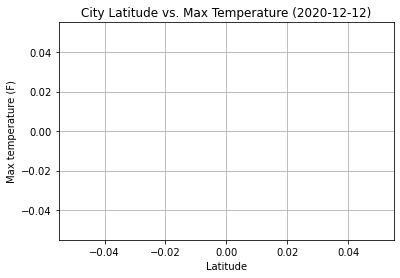

In [14]:
# LATITUDE VERSUS TEMPERATURE PLOT
weather_data.plot(kind='scatter', x='Latitude', y='Max Temp', c='DarkBlue')
plt.title('City Latitude vs. Max Temperature ({})'.format(date.today()))
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("Images/LatitudeVsTemperature.png")

In [15]:
# This code is analyzing the maximum temperature of each city relative to its latitude. As expected the highest temperature
# ratings are evidenced closest to the equator, or between -20 and +20 latitude. As such, a correlation between these
# metrics can be thought to exist. Interestingly, the highest few temperatures are evidenced slightly below the equator as
# opposed to more evenly split across each side of the equator.

## Latitude vs. Humidity Plot

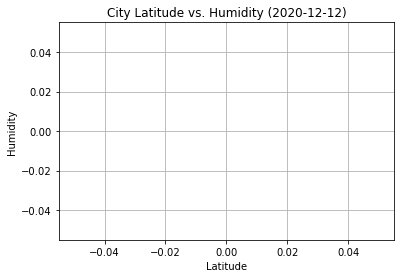

In [16]:
# LATITUDE VERSUS HUMIDITY PLOT
weather_data.plot(kind='scatter', x='Latitude', y='Humidity', c='DarkBlue')
plt.title('City Latitude vs. Humidity ({})'.format(date.today()))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("Images/LatitudeVsHumidity.png")

In [ ]:
# This code is analyzing the humidity of each city relative to its latitude. There does not appear to be a strong
# correlation between these two metrics as higher (or lower) humidity readings appear across all latitudes.

## Latitude vs. Cloudiness Plot

In [ ]:
# LATITUDE VERSUS CLOUDINESS PLOT
weather_data.plot(kind='scatter', x='Latitude', y='Cloudiness', c='DarkBlue')
plt.title('City Latitude vs. Cloudiness ({})'.format(date.today()))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig("Images/LatitudeVsCloudiness.png")

In [ ]:
# This code is analyzing the cloudiness level of each city relative to its latitude. There does not appear to be a strong
# correlation between these two metrics as cloudiness levels are almost evenly distributed across the entire spectrum of 
# latitudes.

## Latitude vs. Wind Speed Plot

In [ ]:
# LATITUDE VERSUS WIND SPEED PLOT
weather_data.plot(kind='scatter', x='Latitude', y='Wind Speed', c='DarkBlue')
plt.title('City Latitude vs. Wind Speed ({})'.format(date.today()))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("Images/LatitudeVsWind Speed.png")

In [ ]:
# This code is analyzing the wind speed of each city relative to its latitude. There does not appear to be a strong
# correlation between these two metrics as a similar (and broad) range of wind speed appears to exist across the entire
# spectrum of latitudes.

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

## Linear Regression

In [ ]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plotLinearRegression(x_values,y_values,'Lat','Max Temp',(6,30),"latvmaxtemp")

In [ ]:
# This scatterplot reflects an r-squared value of -0.87, revealing a strong negative linear relationship between decreasing
# latitude and decreasing temperature in the Northern Hemisphere. Said another way 87% of the variance is explained by
# this linear model of y = -0.75 + 91.41, which is very good.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plotLinearRegression(x_values,y_values,'Lat','Max Temp',(6,30),"latvmaxtemp")

In [ ]:
# This scatter plot shows a weaker relationship between temperature and latitude in the Southern Hemisphere, with an
# r-squared value of 0.72. Said another way, the linear curve fit can only account for 72% of the variance seen in the data,
# leaving the majority of the variance unexplained by the linear model. So, although there is an apparent correlation it is
# not as strong as that for the Northern Hemisphere and is fairly weak at best.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plotLinearRegression(x_values,y_values,'Lat','Humidity',(6,30),"lathumdity")

In [ ]:
# This scatter plot shows a very weak relationship between latitude and humidity in the Northern Hemisphere with an
# r-squared value of 0.12. This linear curve can only account for 12% of the variance seen in the data,
# leaving the vast majority of the variance unexplained by the equation of the line y = 0.13x + 66.63. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plotLinearRegression(x_values,y_values,'Lat','Humidity',(6,30),"lathumdity")

In [ ]:
# In the Southern Hemisphere there is a very weak correlation between latitude and humidity. The linear regression has an
# r-squared value of 0.05, meaning 5% of the variance in the data is explained by the curve fit. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plotLinearRegression(x_values,y_values,'Lat','Cloudiness',(6,30),"latcloudiness")

In [ ]:
# In the Northern Hemisphere there is not an apparent significant correlation between latitude and cloudiness.
# The linear regression curve fit yields an equation of the line with an r-squared value of only 0.06, meaning the
# linear equation of the line only explains 6% of the variance seen. The line of best fit confirms that there is
# really no correlation between latitude and cloudiness in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plotLinearRegression(x_values,y_values,'Lat','Cloudiness',(6,30),"latcloudiness")

In [ ]:
# In the Southern Hemisphere, latitude weakly correlates with cloudiness with an equation of the linear regression
# yielding an r-squared value of 0.10, meaning only 10% of the variance of the observed data can be accounted for by this
# equation. In short, this is a weak correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plotLinearRegression(x_values,y_values,'Lat','Wind Speed',(6,30),"latwind_speed")

In [ ]:
# There is a low correlation between latitude and wind speed in the Northern Hemisphere. Only 16% of the variance can be
# accounted for by the line of best fit.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plotLinearRegression(x_values,y_values,'Lat','Wind Speed',(6,30),"latwind_speed")

In [ ]:
# For the Southern Hemisphere there is a stronger correlation between latitude and wind speed with an r-squared value
# of -0.24. A weak measure, it is saying that the majority of the variance cannot be explained by the
# linear regression curve fit between wind speed and latitude.